In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor
import twitter_credentials as tc
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
import nltk 
import string
import re
get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_colwidth', 100)
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tdnag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tdnag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#load train data
def load_data():
    data = pd.read_csv('train111.csv',encoding='latin-1')
    return data
df = load_data()
df.head()

#print('Columns are:',tweet_df.columns)



,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2...
4,5,0,i think mi bf is cheating on me!!! T_T


In [3]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [4]:
#preprocessing of train data
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['SentimentText'].apply(lambda x: remove_punct(x))

def tokenization(text):
    text = re.split('\W+', text)
    return text
df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))

wn = nltk.WordNetLemmatizer()
df['Tweet_lemmatized'] = df['Tweet_stemmed'].apply(lambda x: ' '.join([wn.lemmatize(word,'v')for word in x]))
print(df.columns)
df.head()


Index(['ItemID', 'Sentiment', 'SentimentText', 'Tweet_punct',
       'Tweet_tokenized', 'Tweet_nonstop', 'Tweet_stemmed',
       'Tweet_lemmatized'],
      dtype='object')


,ItemID,Sentiment,SentimentText,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,1,0,is so sad for my APL friend.............,is so sad for my APL friend,"[, is, so, sad, for, my, apl, friend]","[, sad, apl, friend]","[, sad, apl, friend]",sad apl friend
1,2,0,I missed the New Moon trailer...,I missed the New Moon trailer,"[, i, missed, the, new, moon, trailer]","[, missed, new, moon, trailer]","[, miss, new, moon, trailer]",miss new moon trailer
2,3,1,omg its already 7:30 :O,omg its already O,"[, omg, its, already, o]","[, omg, already]","[, omg, alreadi]",omg alreadi
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2...,Omgaga Im sooo im gunna CRy Ive been at this dentist since I was suposed just get ...,"[, omgaga, im, sooo, im, gunna, cry, ive, been, at, this, dentist, since, i, was, suposed, just,...","[, omgaga, im, sooo, im, gunna, cry, ive, dentist, since, suposed, get, crown, put, mins]","[, omgaga, im, sooo, im, gunna, cri, ive, dentist, sinc, supos, get, crown, put, min]",omgaga im sooo im gunna cri ive dentist sinc supos get crown put min
4,5,0,i think mi bf is cheating on me!!! T_T,i think mi bf is cheating on me TT,"[, i, think, mi, bf, is, cheating, on, me, tt]","[, think, mi, bf, cheating, tt]","[, think, mi, bf, cheat, tt]",think mi bf cheat tt


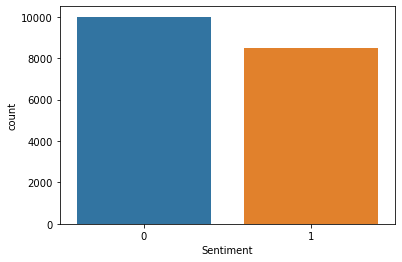

In [5]:
#showing the sentiments of train data 0-negative, 1-positive
sns.countplot(x = 'Sentiment', data = df)

In [6]:
#converting textual data into numeric data using count vectorizer.
countVectorizer = CountVectorizer(analyzer='word') 
text_counts = countVectorizer.fit_transform(df['Tweet_lemmatized'])

MultinomialNB Accuracy: 0.7407140281283808


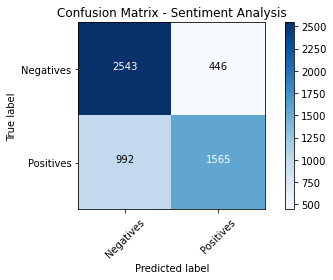

In [7]:
#splitting train data into test and train to feed into model
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Sentiment'], test_size=0.3)

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
cm=confusion_matrix(y_test,predicted)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))
import itertools
classes = ["Negatives", "Positives"]
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Sentiment Analysis")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

#confusion matxi andaccuracy of model
text_format = 'd'
thresh = cm.max() / 2.
for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(column, row, format(cm[row, column], text_format),
             horizontalalignment="center",
             color="white" if cm[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()


In [56]:
#retrieving tweets using twitter API call
auth = OAuthHandler(tc.CONSUMER_KEY, tc.CONSUMER_SECRET)
auth.set_access_token(tc.ACCESS_TOKEN, tc.ACCESS_TOKEN_SECRET)
api = API(auth,wait_on_rate_limit=True)
msg=[]
msgs=[]
hashtag="#tampons"
for tweet in Cursor(api.search,q=hashtag,count=500,lang="en").items():
    msg = [tweet.id, tweet.text]
    user = api.get_status(msg[0])
    created_at = user.created_at 
    msg.append(created_at)
    msgs.append(msg)
test_data=pd.DataFrame(data=[tweet[0] for tweet in msgs],columns=['Id'])
test_data["SentimentText"]=np.array([tweet[1] for tweet in msgs])
test_data["Date"]=np.array([tweet[2] for tweet in msgs])
test_data.head()


,Id,SentimentText,Date
0,1295783233481834496,Enter @ParcelQuicker's #giveaway to win one of two £150 gift vouchers up for grabs! We have a vo...,2020-08-18 18:02:52
1,1295691110887628801,Enter @ParcelQuicker's #giveaway to win one of two £150 gift vouchers up for grabs! We have a vo...,2020-08-18 11:56:48
2,1295680400568745984,Link to ASAI's response: https://t.co/nfNk295Ey5 #periods #tampons @Tampax,2020-08-18 11:14:14
3,1295649258545307649,Enter @ParcelQuicker's #giveaway to win one of two £150 gift vouchers up for grabs! We have a vo...,2020-08-18 09:10:29
4,1295539272922038272,Enter @ParcelQuicker's #giveaway to win one of two £150 gift vouchers up for grabs! We have a vo...,2020-08-18 01:53:27


In [57]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
test_data['Tweet_punct'] = test_data['SentimentText'].apply(lambda x: remove_punct(x))

def tokenization(text):
    text = re.split('\W+', text)
    return text
test_data['Tweet_tokenized'] = test_data['Tweet_punct'].apply(lambda x: tokenization(x.lower()))

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text    
test_data['Tweet_nonstop'] = test_data['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
test_data['Tweet_stemmed'] = test_data['Tweet_nonstop'].apply(lambda x: stemming(x))

wn = nltk.WordNetLemmatizer()
test_data['Tweet_lemmatized'] = test_data['Tweet_stemmed'].apply(lambda x: ' '.join([wn.lemmatize(word,'v')for word in x]))
test_data.head()

,Id,SentimentText,Date,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,1295783233481834496,Enter @ParcelQuicker's #giveaway to win one of two £150 gift vouchers up for grabs! We have a vo...,2020-08-18 18:02:52,Enter ParcelQuickers giveaway to win one of two £ gift vouchers up for grabs We have a voucher f...,"[enter, parcelquickers, giveaway, to, win, one, of, two, gift, vouchers, up, for, grabs, we, hav...","[enter, parcelquickers, giveaway, win, one, two, gift, vouchers, grabs, voucher, httpstcoltqwzpid]","[enter, parcelquick, giveaway, win, one, two, gift, voucher, grab, voucher, httpstcoltqwzpid]",enter parcelquick giveaway win one two gift voucher grab voucher httpstcoltqwzpid
1,1295691110887628801,Enter @ParcelQuicker's #giveaway to win one of two £150 gift vouchers up for grabs! We have a vo...,2020-08-18 11:56:48,Enter ParcelQuickers giveaway to win one of two £ gift vouchers up for grabs We have a voucher f...,"[enter, parcelquickers, giveaway, to, win, one, of, two, gift, vouchers, up, for, grabs, we, hav...","[enter, parcelquickers, giveaway, win, one, two, gift, vouchers, grabs, voucher, httpstcokhezbqhdk]","[enter, parcelquick, giveaway, win, one, two, gift, voucher, grab, voucher, httpstcokhezbqhdk]",enter parcelquick giveaway win one two gift voucher grab voucher httpstcokhezbqhdk
2,1295680400568745984,Link to ASAI's response: https://t.co/nfNk295Ey5 #periods #tampons @Tampax,2020-08-18 11:14:14,Link to ASAIs response httpstconfNkEy periods tampons Tampax,"[link, to, asais, response, httpstconfnkey, periods, tampons, tampax]","[link, asais, response, httpstconfnkey, periods, tampons, tampax]","[link, asai, respons, httpstconfnkey, period, tampon, tampax]",link asai respons httpstconfnkey period tampon tampax
3,1295649258545307649,Enter @ParcelQuicker's #giveaway to win one of two £150 gift vouchers up for grabs! We have a vo...,2020-08-18 09:10:29,Enter ParcelQuickers giveaway to win one of two £ gift vouchers up for grabs We have a voucher f...,"[enter, parcelquickers, giveaway, to, win, one, of, two, gift, vouchers, up, for, grabs, we, hav...","[enter, parcelquickers, giveaway, win, one, two, gift, vouchers, grabs, voucher, httpstcolvjeefpsz]","[enter, parcelquick, giveaway, win, one, two, gift, voucher, grab, voucher, httpstcolvjeefpsz]",enter parcelquick giveaway win one two gift voucher grab voucher httpstcolvjeefpsz
4,1295539272922038272,Enter @ParcelQuicker's #giveaway to win one of two £150 gift vouchers up for grabs! We have a vo...,2020-08-18 01:53:27,Enter ParcelQuickers giveaway to win one of two £ gift vouchers up for grabs We have a voucher f...,"[enter, parcelquickers, giveaway, to, win, one, of, two, gift, vouchers, up, for, grabs, we, hav...","[enter, parcelquickers, giveaway, win, one, two, gift, vouchers, grabs, voucher, httpstcolbphcey...","[enter, parcelquick, giveaway, win, one, two, gift, voucher, grab, voucher, httpstcolbphceyerg]",enter parcelquick giveaway win one two gift voucher grab voucher httpstcolbphceyerg


In [58]:
## for transforming the whole train data ##
train_tf = countVectorizer.fit_transform(df['Tweet_lemmatized'])
## for transforming the test data ##
test_tf = countVectorizer.transform(test_data['Tweet_lemmatized'])
## fitting the model on the transformed train data ##
clf.fit(train_tf,df['Sentiment'])
## predicting the results ##
predictions = clf.predict(test_tf)


In [62]:
#storing the predictions in a .csv file
pred=[]
for x in predictions:
    if(x==0):
        pred.append("Negative")
    else:
        pred.append("Positive")
final_result = pd.DataFrame({'Twitter ID':test_data['Id'],'Date of Tweet':test_data["Date"],'Sentiment':pred})
final_result.to_csv('output.csv',index=False)

In [63]:
#result
output = pd.read_csv('output.csv')
output.head(10)

,Twitter ID,Date of Tweet,Sentiment
0,1295783233481834496,2020-08-18 18:02:52,Positive
1,1295691110887628801,2020-08-18 11:56:48,Positive
2,1295680400568745984,2020-08-18 11:14:14,Positive
3,1295649258545307649,2020-08-18 09:10:29,Positive
4,1295539272922038272,2020-08-18 01:53:27,Positive
5,1295508154181091329,2020-08-17 23:49:47,Negative
6,1295485079209172992,2020-08-17 22:18:06,Positive
7,1295478866295889922,2020-08-17 21:53:25,Positive
8,1295438683902889984,2020-08-17 19:13:44,Positive
9,1295436368454324225,2020-08-17 19:04:32,Positive


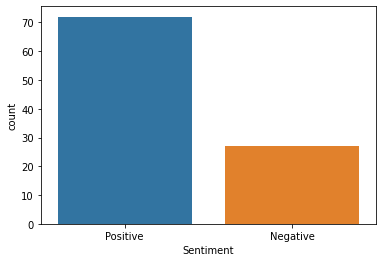

In [61]:
#graph showing the tweet sentiment predictions of model 
sns.countplot(x = 'Sentiment', data = final_result)